In [46]:
from pathlib import Path

import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

from jjuoda_dl4 import utils

sns.set_context("talk")
matplotlib.rcParams['figure.figsize'] = (6, 6)

### Data loads

In [47]:
BASE_RAW_NELA_GT_2018_PATH = utils.BASE_DATA_DIR / "raw/NELA-GT-2018"
BASE_FIGURES_NELA_GT_2018_PATH = utils.BASE_FIGURES_DIR / "eda_nela_gt_2018"

In [48]:
labels = pd.read_csv(BASE_RAW_NELA_GT_2018_PATH / "labels.csv", index_col=0)
labels.head()

,"NewsGuard, Does not repeatedly publish false content","NewsGuard, Gathers and presents information responsibly","NewsGuard, Regularly corrects or clarifies errors","NewsGuard, Handles the difference between news and opinion responsibly","NewsGuard, Avoids deceptive headlines","NewsGuard, Website discloses ownership and financing","NewsGuard, Clearly labels advertising","NewsGuard, Reveals who's in charge, including any possible conflicts of interest","NewsGuard, Provides information about content creators","NewsGuard, score",...,"Allsides, community_agree","Allsides, community_disagree","Allsides, community_label","BuzzFeed, leaning","PolitiFact, Pants on Fire!","PolitiFact, False","PolitiFact, Mostly False","PolitiFact, Half-True","PolitiFact, Mostly True","PolitiFact, True"
21stCenturyWire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,left,NaN,NaN,NaN,NaN,NaN,NaN
ABC News,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,95.0,...,8964.0,6949.0,somewhat agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMERICAblog News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,left,NaN,NaN,NaN,NaN,NaN,NaN
Activist Post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,left,NaN,NaN,NaN,NaN,NaN,NaN
Addicting Info,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,left,NaN,NaN,NaN,NaN,NaN,NaN


So labels has sources as rows and columns are some sites providing some kind of labels about the sources.

### Label analysis

In [49]:
labels.isna().mean()

NewsGuard, Does not repeatedly publish false content                                0.561856
NewsGuard, Gathers and presents information responsibly                             0.561856
NewsGuard, Regularly corrects or clarifies errors                                   0.561856
NewsGuard, Handles the difference between news and opinion responsibly              0.561856
NewsGuard, Avoids deceptive headlines                                               0.561856
NewsGuard, Website discloses ownership and financing                                0.561856
NewsGuard, Clearly labels advertising                                               0.561856
NewsGuard, Reveals who's in charge, including any possible conflicts of interest    0.561856
NewsGuard, Provides information about content creators                              0.561856
NewsGuard, score                                                                    0.561856
NewsGuard, overall_class                                              

#### NewsGuard labels

<AxesSubplot:>

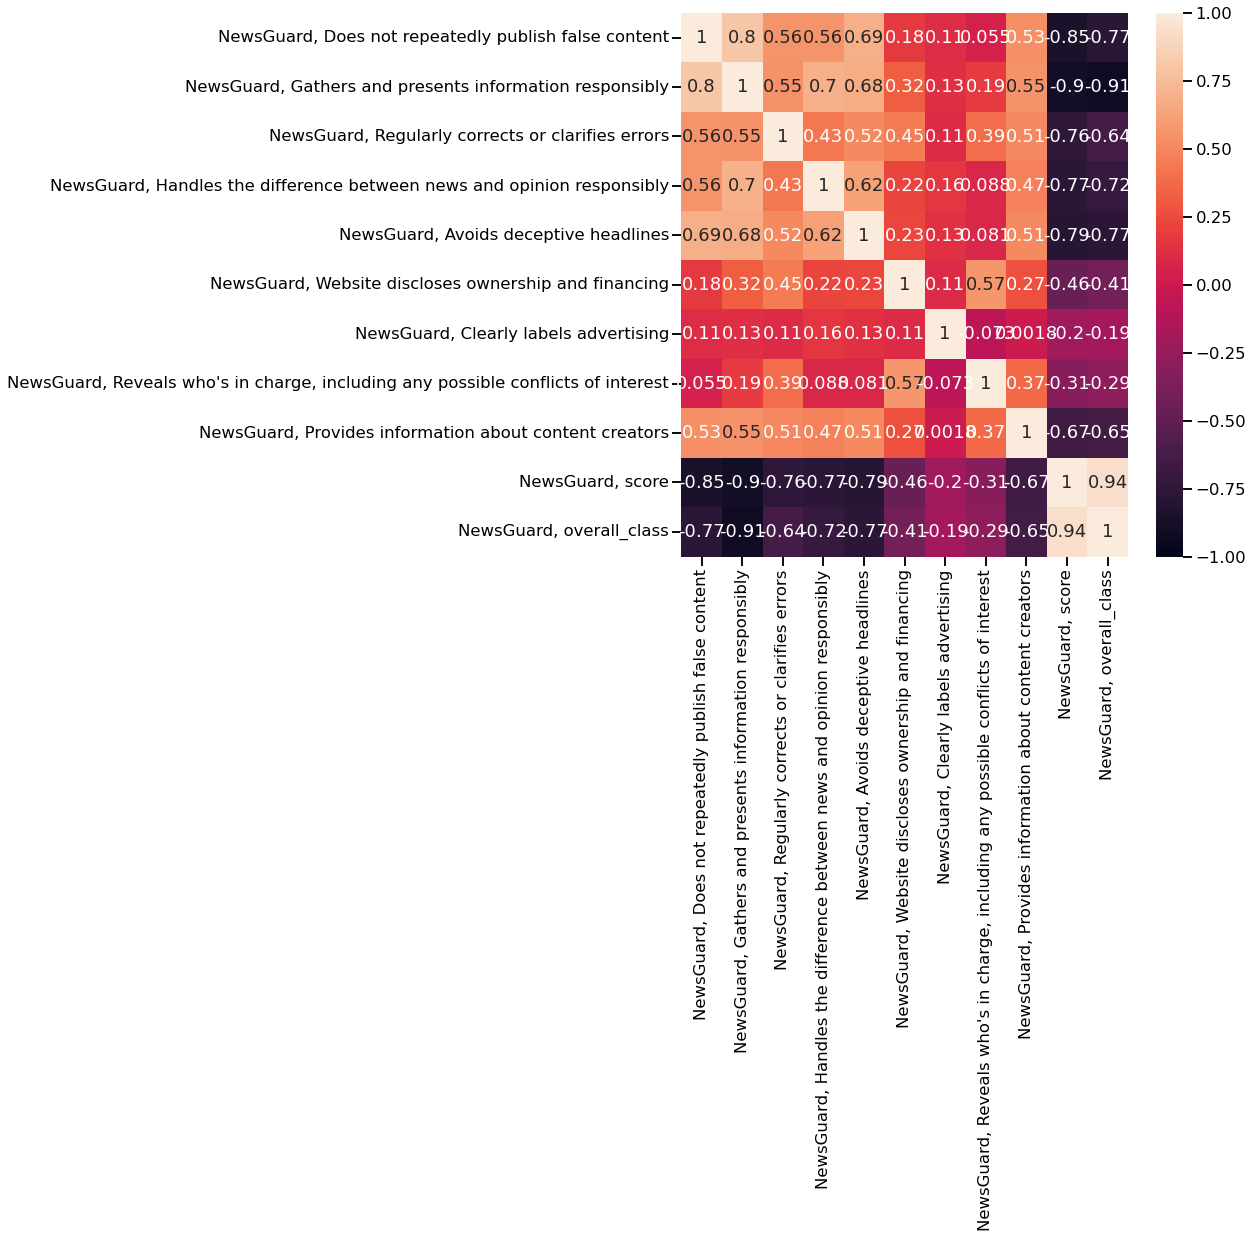

In [50]:
plt.figure(figsize=(10, 10))

sns.heatmap(labels.filter(regex="NewsGuard").corr(), annot=True, vmin=-1, vmax=1)

It's interesting how every feature I'd associate with more responsible news reporting negatively correlates with overall NewsGuard score/overall class.

In [51]:
labels.loc["FiveThirtyEight"].filter(regex="NewsGuard")

NewsGuard, Does not repeatedly publish false content                                  0.0
NewsGuard, Gathers and presents information responsibly                               0.0
NewsGuard, Regularly corrects or clarifies errors                                     0.0
NewsGuard, Handles the difference between news and opinion responsibly                0.0
NewsGuard, Avoids deceptive headlines                                                 0.0
NewsGuard, Website discloses ownership and financing                                  0.0
NewsGuard, Clearly labels advertising                                                 0.0
NewsGuard, Reveals who's in charge, including any possible conflicts of interest      0.0
NewsGuard, Provides information about content creators                                0.0
NewsGuard, score                                                                    100.0
NewsGuard, overall_class                                                              1.0
Name: Five

In [52]:
labels.loc["Breitbart"].filter(regex="NewsGuard")

NewsGuard, Does not repeatedly publish false content                                 0.0
NewsGuard, Gathers and presents information responsibly                              1.0
NewsGuard, Regularly corrects or clarifies errors                                    0.0
NewsGuard, Handles the difference between news and opinion responsibly               1.0
NewsGuard, Avoids deceptive headlines                                                0.0
NewsGuard, Website discloses ownership and financing                                 1.0
NewsGuard, Clearly labels advertising                                                0.0
NewsGuard, Reveals who's in charge, including any possible conflicts of interest     1.0
NewsGuard, Provides information about content creators                               0.0
NewsGuard, score                                                                    57.0
NewsGuard, overall_class                                                             0.0
Name: Breitbart, dtyp

Likely the labels are flipped with 1 in NewsGuard features being not "true", but "negative in this regard".  
It'll be much simpler and less confusing to just use overall class.

### Pew Research Center labels

In [53]:
labels.filter(regex="Pew Research Center").dropna().head()

,"Pew Research Center, known_by_40%","Pew Research Center, total","Pew Research Center, consistently_liberal","Pew Research Center, mostly_liberal","Pew Research Center, mixed","Pew Research Center, mostly conservative","Pew Research Center, consistently conservative"
ABC News,1.0,1.0,1.0,1.0,1.0,1.0,-1.0
Al Jazeera,1.0,-1.0,1.0,0.0,-1.0,-1.0,-1.0
BBC,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Breitbart,0.0,0.0,-1.0,-1.0,0.0,1.0,1.0
Buzzfeed,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


<AxesSubplot:>

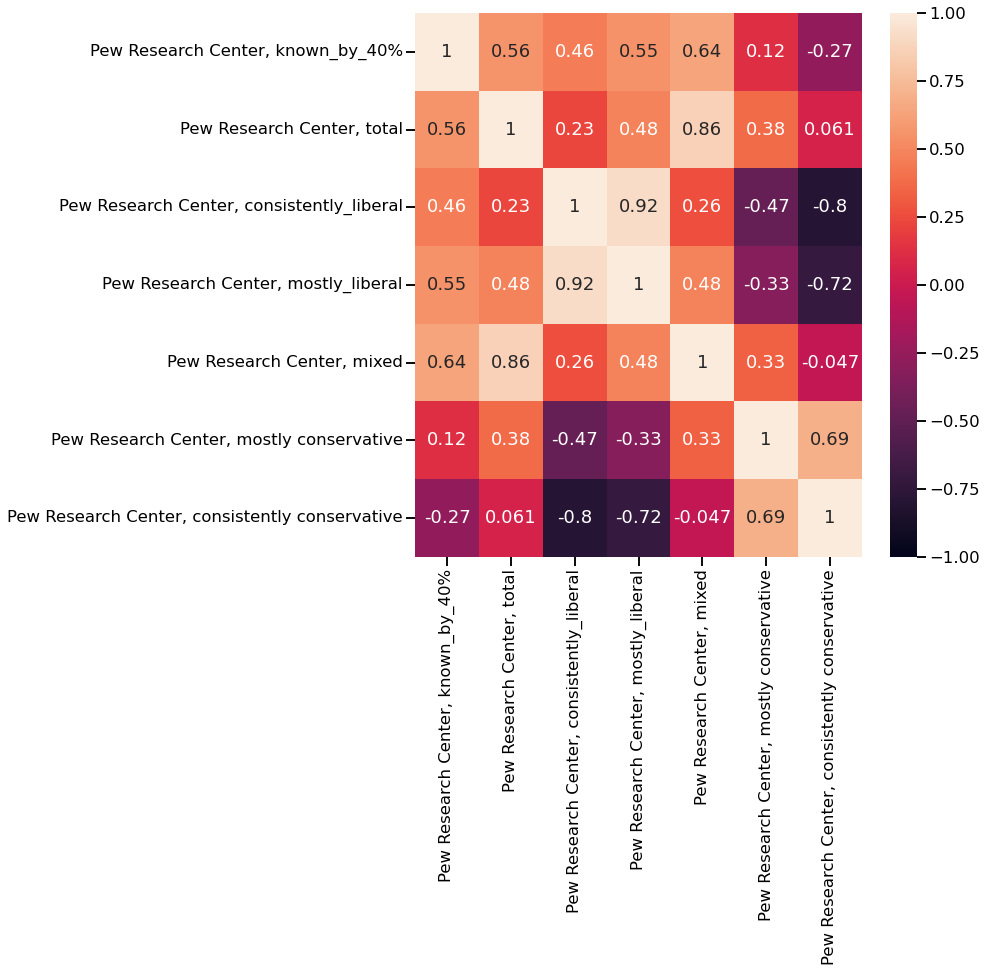

In [54]:
plt.figure(figsize=(10, 10))

sns.heatmap(
    labels.filter(regex="Pew Research Center").corr(), annot=True, vmin=-1, vmax=1
)

I don't think I can use Pew's labels.

#### Wikipedia labels

In [55]:
labels.filter(regex="Wikipedia").dropna().head()

,"Wikipedia, is_fake"
DC Gazette,1.0
FT Westminster Blog,1.0
GlobalResearch,1.0
Infowars,1.0
Natural News,1.0


In [56]:
labels.filter(regex="Wikipedia").dropna().describe()

,"Wikipedia, is_fake"
count,5.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


Five sources are notorious enough to be labeled as fake in wikipedia of all things.

#### Open Sources labels

In [57]:
labels.filter(regex="Open Sources").dropna(how="all").head()

,"Open Sources, reliable","Open Sources, fake","Open Sources, unreliable","Open Sources, bias","Open Sources, conspiracy","Open Sources, hate","Open Sources, junksci","Open Sources, rumor","Open Sources, blog","Open Sources, clickbait","Open Sources, political","Open Sources, satire","Open Sources, state"
21stCenturyWire,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMERICAblog News,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
Activist Post,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Addicting Info,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Alternet,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [58]:
labels.filter(regex="Open Sources").dropna(how="all").shape

(71, 13)

In [59]:
labels.filter(regex="Open Sources").dropna(how="all").describe()

,"Open Sources, reliable","Open Sources, fake","Open Sources, unreliable","Open Sources, bias","Open Sources, conspiracy","Open Sources, hate","Open Sources, junksci","Open Sources, rumor","Open Sources, blog","Open Sources, clickbait","Open Sources, political","Open Sources, satire","Open Sources, state"
count,3.0,6.000000,15.000000,25.000000,16.000000,2.000000,3.000000,2.000000,0.0,14.000000,19.000000,13.000000,2.000000
mean,2.0,1.333333,1.866667,1.600000,1.437500,1.500000,1.333333,1.500000,NaN,1.714286,1.157895,1.153846,1.500000
std,0.0,0.816497,0.639940,0.763763,0.727438,0.707107,0.577350,0.707107,NaN,0.468807,0.501460,0.375534,0.707107
min,2.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000
25%,2.0,1.000000,1.500000,1.000000,1.000000,1.250000,1.000000,1.250000,NaN,1.250000,1.000000,1.000000,1.250000
50%,2.0,1.000000,2.000000,1.000000,1.000000,1.500000,1.000000,1.500000,NaN,2.000000,1.000000,1.000000,1.500000
75%,2.0,1.000000,2.000000,2.000000,2.000000,1.750000,1.500000,1.750000,NaN,2.000000,1.000000,1.000000,1.750000
max,2.0,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,NaN,2.000000,3.000000,2.000000,2.000000


In [60]:
labels.loc["FiveThirtyEight"].filter(regex="Open Sources")

Open Sources, reliable      NaN
Open Sources, fake          NaN
Open Sources, unreliable    NaN
Open Sources, bias          NaN
Open Sources, conspiracy    NaN
Open Sources, hate          NaN
Open Sources, junksci       NaN
Open Sources, rumor         NaN
Open Sources, blog          NaN
Open Sources, clickbait     NaN
Open Sources, political     NaN
Open Sources, satire        NaN
Open Sources, state         NaN
Name: FiveThirtyEight, dtype: object

In [61]:
labels.loc["Breitbart"].filter(regex="Open Sources")

Open Sources, reliable      NaN
Open Sources, fake          NaN
Open Sources, unreliable    2.0
Open Sources, bias          3.0
Open Sources, conspiracy    NaN
Open Sources, hate          NaN
Open Sources, junksci       NaN
Open Sources, rumor         NaN
Open Sources, blog          NaN
Open Sources, clickbait     NaN
Open Sources, political     1.0
Open Sources, satire        NaN
Open Sources, state         NaN
Name: Breitbart, dtype: object

So we have any info at all on 71 sources. Numbers likely mean the number of articles that open sources analysed and deemed reliable (or fake, or biased or so on). That's some info but I'd want to use more reliable labels before considering a news source as reliable.

#### Media Bias / Fact Check labels

In [62]:
labels.filter(regex="Media Bias / Fact Check").dropna(how="all").head()

,"Media Bias / Fact Check, label","Media Bias / Fact Check, factual_reporting","Media Bias / Fact Check, extreme_left","Media Bias / Fact Check, right","Media Bias / Fact Check, extreme_right","Media Bias / Fact Check, propaganda","Media Bias / Fact Check, fake_news","Media Bias / Fact Check, some_fake_news","Media Bias / Fact Check, failed_fact_checks","Media Bias / Fact Check, conspiracy","Media Bias / Fact Check, pseudoscience","Media Bias / Fact Check, hate_group","Media Bias / Fact Check, anti_islam","Media Bias / Fact Check, nationalism"
21stCenturyWire,conspiracy_pseudoscience,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABC News,left_center_bias,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Activist Post,conspiracy_pseudoscience,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Addicting Info,left_bias,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Al Jazeera,left_center_bias,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
labels.filter(regex="Media Bias / Fact Check").dropna(how="all").shape

(135, 14)

In [64]:
labels.filter(regex="Media Bias / Fact Check").dropna(how="all").describe()

,"Media Bias / Fact Check, factual_reporting","Media Bias / Fact Check, extreme_left","Media Bias / Fact Check, right","Media Bias / Fact Check, extreme_right","Media Bias / Fact Check, propaganda","Media Bias / Fact Check, fake_news","Media Bias / Fact Check, some_fake_news","Media Bias / Fact Check, failed_fact_checks","Media Bias / Fact Check, conspiracy","Media Bias / Fact Check, pseudoscience","Media Bias / Fact Check, hate_group","Media Bias / Fact Check, anti_islam","Media Bias / Fact Check, nationalism"
count,112.000000,135.000000,135.000000,135.000000,135.000000,135.0,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,3.437500,0.014815,0.007407,0.088889,0.096296,0.0,0.029630,0.007407,0.066667,0.007407,0.014815,0.007407,0.007407
std,0.681562,0.121261,0.086066,0.285643,0.296096,0.0,0.170195,0.086066,0.250373,0.086066,0.121261,0.086066,0.086066
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='NewsGuard, score', ylabel='Media Bias / Fact Check, factual_reporting'>

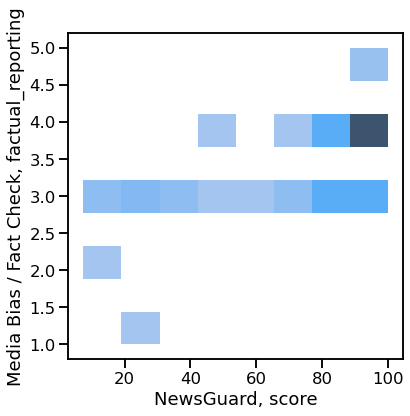

In [65]:
sns.histplot(
    x=labels["NewsGuard, score"], y=labels["Media Bias / Fact Check, factual_reporting"]
)

<AxesSubplot:xlabel='NewsGuard, score', ylabel='Media Bias / Fact Check, label'>

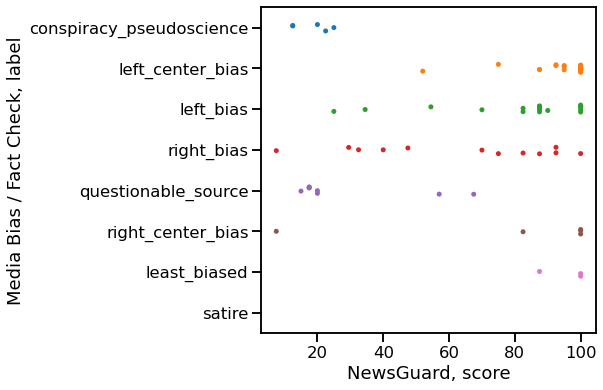

In [66]:
sns.stripplot(x=labels["NewsGuard, score"], y=labels["Media Bias / Fact Check, label"])

In [67]:
labels.loc["FiveThirtyEight"].filter(regex="Media Bias / Fact Check")

Media Bias / Fact Check, label                 left_center_bias
Media Bias / Fact Check, factual_reporting                  4.0
Media Bias / Fact Check, extreme_left                       0.0
Media Bias / Fact Check, right                              0.0
Media Bias / Fact Check, extreme_right                      0.0
Media Bias / Fact Check, propaganda                         0.0
Media Bias / Fact Check, fake_news                          0.0
Media Bias / Fact Check, some_fake_news                     0.0
Media Bias / Fact Check, failed_fact_checks                 0.0
Media Bias / Fact Check, conspiracy                         0.0
Media Bias / Fact Check, pseudoscience                      0.0
Media Bias / Fact Check, hate_group                         0.0
Media Bias / Fact Check, anti_islam                         0.0
Media Bias / Fact Check, nationalism                        0.0
Name: FiveThirtyEight, dtype: object

In [68]:
labels.loc["Breitbart"].filter(regex="Media Bias / Fact Check")

Media Bias / Fact Check, label                 questionable_source
Media Bias / Fact Check, factual_reporting                     NaN
Media Bias / Fact Check, extreme_left                          0.0
Media Bias / Fact Check, right                                 0.0
Media Bias / Fact Check, extreme_right                         1.0
Media Bias / Fact Check, propaganda                            1.0
Media Bias / Fact Check, fake_news                             0.0
Media Bias / Fact Check, some_fake_news                        0.0
Media Bias / Fact Check, failed_fact_checks                    1.0
Media Bias / Fact Check, conspiracy                            1.0
Media Bias / Fact Check, pseudoscience                         0.0
Media Bias / Fact Check, hate_group                            0.0
Media Bias / Fact Check, anti_islam                            0.0
Media Bias / Fact Check, nationalism                           0.0
Name: Breitbart, dtype: object

#### Allsides labels

In [69]:
labels.filter(regex="Allsides").dropna(how="all").head()

,"Allsides, bias_rating","Allsides, community_agree","Allsides, community_disagree","Allsides, community_label"
ABC News,Lean Left,8964.0,6949.0,somewhat agree
Al Jazeera,Center,2204.0,3249.0,somewhat disagree
Alternet,Left,1314.0,595.0,strongly agree
BBC,Center,7527.0,7177.0,somewhat agree
Breitbart,Right,11911.0,6546.0,agree


Can't use these to differentiate between reliable sources and not.

#### BuzzFeed labels

In [70]:
labels.filter(regex="BuzzFeed").dropna(how="all").head()

,"BuzzFeed, leaning"
21stCenturyWire,left
AMERICAblog News,left
Activist Post,left
Addicting Info,left
Alternet,left


Can't use this to distinguish reliable sources from unreliable.

#### Politifact labels

In [71]:
labels.filter(regex="PolitiFact").dropna(how="all").head()

,"PolitiFact, Pants on Fire!","PolitiFact, False","PolitiFact, Mostly False","PolitiFact, Half-True","PolitiFact, Mostly True","PolitiFact, True"
Al Jazeera,0.0,1.0,0.0,0.0,0.0,0.0
Bipartisan Report,0.0,1.0,0.0,0.0,0.0,0.0
Breitbart,2.0,2.0,0.0,0.0,1.0,0.0
Buzzfeed,1.0,0.0,0.0,0.0,0.0,0.0
CNN,0.0,0.0,1.0,0.0,0.0,0.0


In [72]:
(labels.filter(regex="PolitiFact").dropna(how="all") > 0).sum()

PolitiFact, Pants on Fire!    9
PolitiFact, False             8
PolitiFact, Mostly False      6
PolitiFact, Half-True         4
PolitiFact, Mostly True       3
PolitiFact, True              2
dtype: int64

#### Correlations

In [73]:
all_sides_encoder = OneHotEncoder(sparse=False).fit(labels[["Allsides, bias_rating"]])

all_sides_one_hot = pd.DataFrame(
    all_sides_encoder.transform(labels[["Allsides, bias_rating"]]),
    index=labels.index,
    columns=all_sides_encoder.get_feature_names_out(),
)
all_sides_one_hot

,"Allsides, bias_rating_Center","Allsides, bias_rating_Lean Left","Allsides, bias_rating_Lean Right","Allsides, bias_rating_Left","Allsides, bias_rating_Right","Allsides, bias_rating_nan"
21stCenturyWire,0.0,0.0,0.0,0.0,0.0,1.0
ABC News,0.0,1.0,0.0,0.0,0.0,0.0
AMERICAblog News,0.0,0.0,0.0,0.0,0.0,1.0
Activist Post,0.0,0.0,0.0,0.0,0.0,1.0
Addicting Info,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
iPolitics,0.0,0.0,0.0,0.0,0.0,1.0
oann,0.0,0.0,0.0,0.0,0.0,1.0
rferl,0.0,0.0,0.0,0.0,0.0,1.0
sott.net,0.0,0.0,0.0,0.0,0.0,1.0


15


<AxesSubplot:>

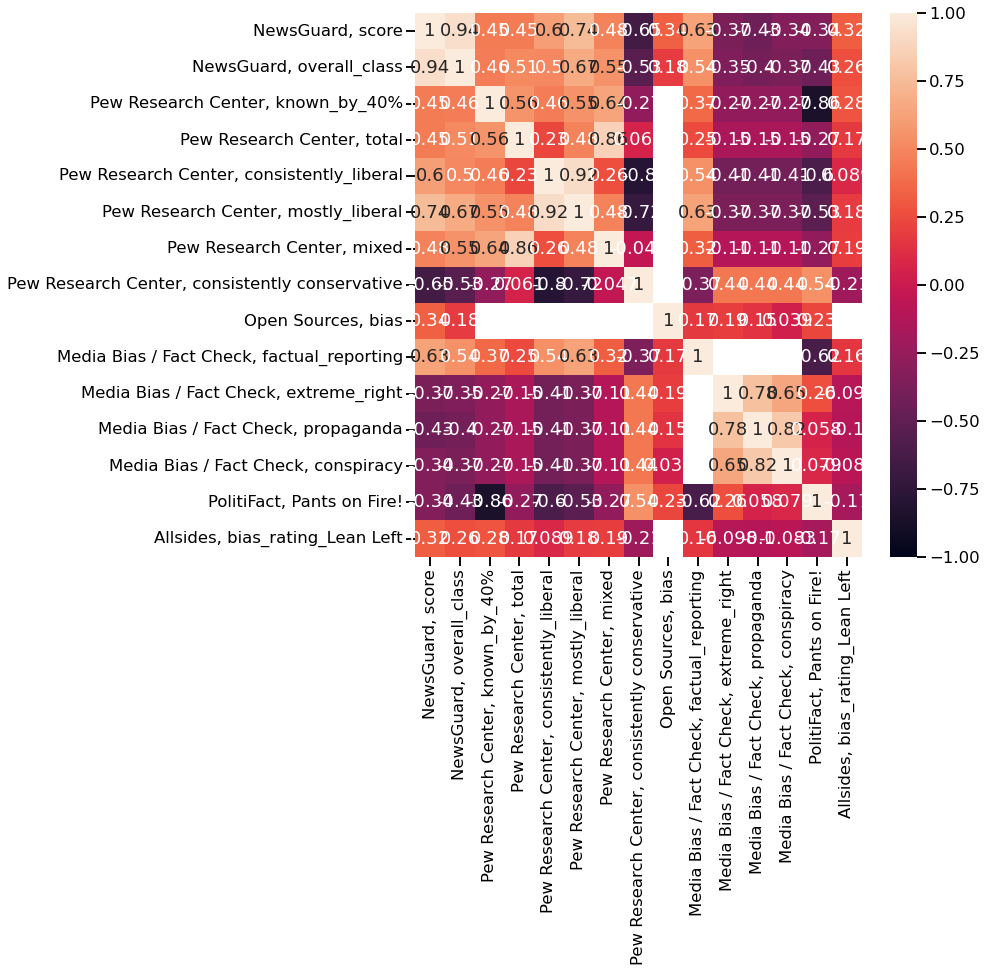

In [74]:
plt.figure(figsize=(10, 10))

count_treshold = len(labels) // 10
corr_threshold = 0.3

merged = labels.merge(
    all_sides_one_hot.drop("Allsides, bias_rating_nan", axis="columns"),
    left_index=True,
    right_index=True,
)
merged.drop(
    [
        "NewsGuard, Does not repeatedly publish false content",
        "NewsGuard, Gathers and presents information responsibly",
        "NewsGuard, Regularly corrects or clarifies errors",
        "NewsGuard, Handles the difference between news and opinion responsibly",
        "NewsGuard, Avoids deceptive headlines",
        "NewsGuard, Website discloses ownership and financing",
        "NewsGuard, Clearly labels advertising",
        "NewsGuard, Reveals who's in charge, including any possible conflicts of interest",
        "NewsGuard, Provides information about content creators",
    ],
    axis=1,
    inplace=True,
)
enough_labels = merged.notna().sum() > count_treshold

look_at = (
    merged.loc[:, enough_labels].corrwith(labels["NewsGuard, score"]).abs()
    > corr_threshold
)
corr_matrix = merged.loc[:, look_at[look_at].index].corr()

print(look_at.sum())

sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1)

<AxesSubplot:xlabel='NewsGuard, score', ylabel='Count'>

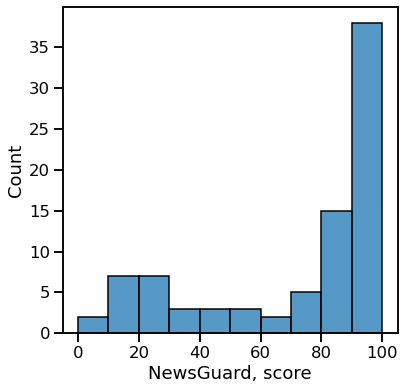

In [75]:
sns.histplot(x="NewsGuard, score", data=labels, binwidth=10, binrange=(0, 100))

In [76]:
labels["Media Bias / Fact Check, factual_reporting"] < 0

21stCenturyWire     False
ABC News            False
AMERICAblog News    False
Activist Post       False
Addicting Info      False
                    ...  
iPolitics           False
oann                False
rferl               False
sott.net            False
theRussophileorg    False
Name: Media Bias / Fact Check, factual_reporting, Length: 194, dtype: bool

In [77]:
def count_publisher_scores(labels):
    scores = pd.Series(index=labels.index, data=np.zeros(len(labels)))
    # Political leanings correlate well with NewsGuard score,
    # however, I want to avoid biasing model to political stance.
    # So I'm not punishing sources for reporting on conservative issues,
    # even if propaganda/conspiracy theories are more prevelant on the right.

    # every comparison against nan returns False
    scores[labels["NewsGuard, score"] >= 80] += 1
    scores[labels["NewsGuard, score"] <= 30] -= 1

    scores[labels["Pew Research Center, known_by_40%"] > 0] += 0.5

    scores[labels["Media Bias / Fact Check, factual_reporting"] > 3] += 1
    scores[labels["Media Bias / Fact Check, label"] == "least_biased"] += 1
    scores[labels["Media Bias / Fact Check, label"] == "questionable_source"] -= 1
    scores[labels["Media Bias / Fact Check, label"] == "conspiracy_pseudoscience"] -= 1

    scores[labels["PolitiFact, True"] > 0] += 0.5
    scores[labels["PolitiFact, False"] > 0] -= 0.5
    scores[labels["PolitiFact, Pants on Fire!"] > 0] -= 1

    scores.index.name = "source"
    scores.name = "score"

    return scores


scores = count_publisher_scores(labels)
print(
    f"Num reliable sources: {(scores >= 2).sum()}\nNum unreliable sources: {(scores <= -2).sum()}"
)

Num reliable sources: 36
Num unreliable sources: 15


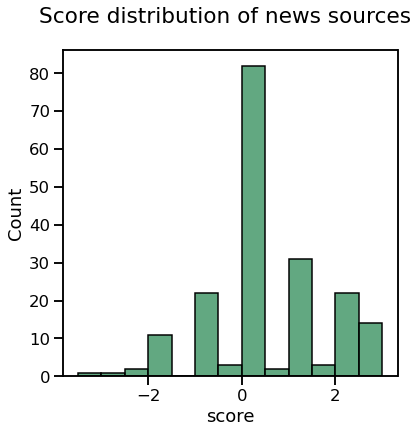

In [78]:
plt.suptitle("Score distribution of news sources")

sns.histplot(scores, binwidth=0.5, color="seagreen")

plt.savefig(utils.BASE_FIGURES_DIR / "eda_nela_gt_2018" / "score_distribution.png")

Ok, so I have 5 sources I feel I can label every article as fake;  
Also, I have 47 sources I'd be pretty confident labelling every article as "true news".  
This may need rechecking when we have the model.

EDIT: I've rechecked and changed how I'm working with labels from Media Bias / Fact Check.  
Now I have 15 unreliable sources and 36 reliable ones.  
I may have to change threshold for reliable/unreliable, I'll check by performance on original dataset.

I honestly forgot to double check source evaluation with google >.>

### Articles analysis

In [79]:
articles = {"path": [], "title": [], "date": [], "source": [], "source_score": []}

for article in Path(BASE_RAW_NELA_GT_2018_PATH / "articles").rglob("*"):
    if article.is_dir():
        continue
    source, date, title = article.name.split("--")
    articles["path"].append(article.relative_to(utils.BASE_DATA_DIR))
    articles["title"].append(title)
    articles["date"].append(date)
    articles["source"].append(source)
    articles["source_score"].append(scores.loc[source])

articles_df = pd.DataFrame(articles)

In [80]:
articles_df = articles_df[articles_df.title != ""]

In [89]:
# my machine runs out of ram when I try to calculate lengths for all articles
# I'll take a subset of the data for now

sample_size = 10000
sample_df = articles_df.sample(sample_size, random_state=42)
sample_df = utils._make_dataframe(sample_df)

sample_df["text_num_words"] = sample_df.text.str.split().str.len()
sample_df["title_num_words"] = sample_df.title.str.split().str.len()

  0%|          | 0/10000 [00:00<?, ?it/s]

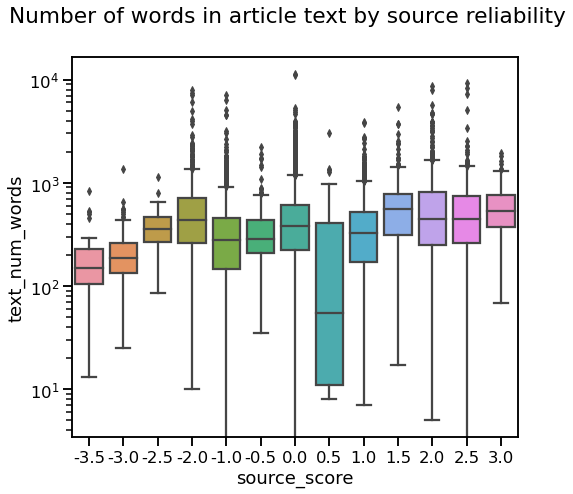

In [91]:
plt.figure(figsize=(8, 7))

plt.suptitle("Number of words in article text by source reliability")
sns.boxplot(x=sample_df["source_score"], y=sample_df["text_num_words"])
plt.semilogy()
plt.savefig(BASE_FIGURES_NELA_GT_2018_PATH / "text_num_words_by_reliability.png")

Hm, interesting. Model could learn to associate shorter texts with fake news.  
I'm also interested to see, what articles ar 10 words lenght o.o.

In [83]:
sample_df[sample_df.source == "MSNBC"].text.iloc[0]

'# AP: Omarosa has video, not just audio\n\nAP reports that Omarosa Manigault Newman has a stash of video, emails, text\nmessages and other documentation supporting the claims in her tell-all book\nabout her time in the Trump White House.Aug.17.2018\n\nRead More'

In [84]:
sample_df[sample_df["text_num_words"] <= 10].sample(10)

,path,title,date,source,source_score,text,text_num_words,title_num_words
299081,raw/NELA-GT-2018/articles/2018-05-18/MSNBC/MSN...,Bob Mueller didnt say that,2018-05-18,MSNBC,0.5,Is the Trump White House the leakiest White Ho...,10,5
125348,raw/NELA-GT-2018/articles/2018-09-21/MSNBC/MSN...,New Source Value Test,2018-09-21,MSNBC,0.5,Why GOP Senators want someone else to question...,9,4
325736,raw/NELA-GT-2018/articles/2018-10-23/Raw Story...,Bomb discovered near home of elderly Jewish ma...,2018-10-23,Raw Story,1.0,# 403 Forbidden\n\n* * *\n\nnginx,7,13
636878,raw/NELA-GT-2018/articles/2018-05-02/MSNBC/MSN...,Pentagon bans two Chinese-made phones from sto...,2018-05-02,MSNBC,0.5,Dep. AG Rosenstein: The Justice Department wil...,10,10
46010,raw/NELA-GT-2018/articles/2018-11-16/New York ...,Heres de Blasios logic for loving Amazon but h...,2018-11-16,New York Post,1.0,Americas largest public-housing complex sits n...,10,10
217315,raw/NELA-GT-2018/articles/2018-04-20/New York ...,Its the beginning of an ugly end for Matt Harv...,2018-04-20,New York Post,1.0,ATLANTA The Mets symbolic salt-and-pepper sha...,9,13
87469,raw/NELA-GT-2018/articles/2018-08-10/Raw Story...,Conservative magazine Republicans will regret ...,2018-08-10,Raw Story,1.0,# 403 Forbidden\n\n* * *\n\nnginx,7,15
415317,raw/NELA-GT-2018/articles/2018-08-29/New York ...,Maria Sharapova struggles but finds a way to b...,2018-08-29,New York Post,1.0,Defending U.S. Open champion Sloane Stephens s...,10,11
621891,raw/NELA-GT-2018/articles/2018-07-07/New York ...,Aaron Hicks knows why JA Happ may be perfect Y...,2018-07-07,New York Post,1.0,TORONTO You dont know a guys adaptability for...,9,11
239814,raw/NELA-GT-2018/articles/2018-07-19/New York ...,Wendy Williams is busting out and more star snaps,2018-07-19,New York Post,1.0,"Whatever happened to ""No Shirt, No Shoes, No S...",9,9


Some articles from NewYorkPost and MSNBC cut off  
Some 403s from Raw Story  
Only date from CNS; also til that CNS and CBS are two different entities.  
I guess I'll keep them. It's a bit difficult to clear them.

<AxesSubplot:xlabel='source_score', ylabel='title_num_words'>

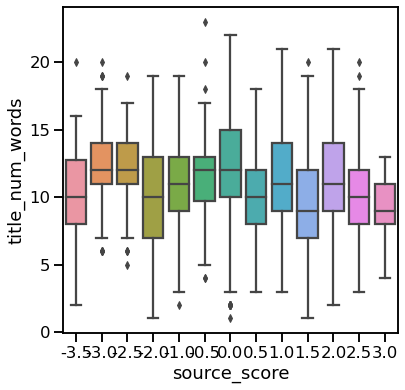

In [85]:
sns.boxplot(data=sample_df, x="source_score", y="title_num_words")

I don't see any trend here.

Let's take a look at random examples, perhaps something will pop up.

In [86]:
sample_df.sample(10)[["title", "text"]]

,title,text
690753,WATCH EUs Juncker Ape Theresa Mays Dancing Que...,Theresa May danced onto the stage at the Conse...
614159,The Supreme Court just agreed to hear a case t...,In what will almost certainly be a victory for...
635197,Global Conspiracy Is Undermining Orthodox Chri...,This\n\n[post](https://russia-insider.com/en/g...
688498,What Is E15 Donald Trump to Lift EPA Ban on Pu...,President Donald Trump has directed the Enviro...
86379,How black chefs still have to fight for repres...,Edouardo Jordan went to culinary school to be ...
642435,NOAH ROTHMAN Ben Rhodes and the Democratic Gui...,NOAH ROTHMAN: Ben Rhodes and the Democratic Gu...
363610,Kim Kardashian fires back at critics of her Tr...,Kim Kardashian West broke her silence about he...
314675,PLO Learned Bitter Oslo Lesson Negotiation Wit...,WASHINGTON The intention behind the Oslo Acco...
41587,Trump Puerto Rico disaster response was an inc...,With Hurricane Florence approaching the Caroli...
84963,Frites could be off the menu in Belgium as hea...,"Belgiums famed chip stalls, or friteries, are ..."


In [87]:
if "sample_df" in locals():
    del sample_df
articles_df = utils._make_dataframe(articles_df)


def clean_text(articles_df):
    def clean_feature(series):
        print(f"Working on: {series.name}")
        print("Cleaning Markdown links")
        series = series.str.replace(r"\[([^\]]+)\]\(([^\)]+)\)", r"\1", regex=True)
        print("Removing all other links")
        series = series.str.replace(
            (
                r"\b"  # anchor to word boundary (speed optimization)
                r"(http(s)?:\/\/)?"  # optional http:// or https://
                r"(www\.)?"  # optional www.
                r"[-a-zA-Z0-9@:%._\+~#=]{2,256}"  # host name
                r"\.[a-z]{2,6}\b"  # domain name
                r"([-a-zA-Z0-9@:%_\+.~#?&//=]*)"  # path
            ),
            r"",
            regex=True,
        )
        # Mainly sign of Instapundit
        print("Removing Posted by lines")
        series = series.str.replace(
            r"Posted by \w+(?: \w+)?(?: at \d{1,2}:\d{1,2} (?:a|p)m)?", r"", regex=True
        )
        print("Removing all empty brackets")
        series = series.str.replace(r"\[\s*\]", "", regex=True)
        series = series.str.replace(r"\(\s*\)", "", regex=True)
        series = series.str.replace(r"\<\s*\>", "", regex=True)
        print("Stripping whitespace")
        series = series.str.strip()
        return series

    print("Dropping articles scraper couldn't parse")
    articles_df = articles_df[~articles_df.text.str.contains("403 Forbidden")]
    articles_df = articles_df[~articles_df.text.str.contains("404 Not Found")]
    articles_df = articles_df[
        ~articles_df.text.str.contains("500 Internal Server Error")
    ]
    articles_df = articles_df[~articles_df.text.str.contains("502 Bad Gateway")]
    articles_df = articles_df[~articles_df.text.str.contains("503 Service Unavailable")]

    print("Dropping articles with 10 words or less")
    # I specifically use apply method since it seems to use less ram, even if it's slower
    articles_df = articles_df[
        articles_df.text.apply(lambda x: len(x.strip().split())) > 10
    ]

    articles_df["text"] = clean_feature(articles_df.text)
    articles_df["title"] = clean_feature(articles_df.title)

    return articles_df


articles_df = clean_text(articles_df)

  0%|          | 0/697538 [00:00<?, ?it/s]

Dropping articles scraper couldn't parse
Dropping articles with 10 words or less


KeyboardInterrupt: 

### Saving data

In [ ]:
articles_df = articles_df.dropna(subset=["title", "text"])

# I'm planning to only use scores -2.5 and lower and 2.5 and higher, but it's easier if every article has a label
articles_df["is_fake"] = articles_df.source_score < 0

articles_df = utils.split_dataframe(articles_df, pd.DataFrame(scores))

We have:
33 reliable sources in train
13 unreliable sources in train
For a total of 130932+54969=185901 articles in train
3 reliable sources in val
2 unreliable sources in val
For a total of 6090+5937=12027 articles in val



In [ ]:
articles_df.to_csv(
    utils.BASE_DATA_DIR / "interim" / "nela-gt-2018-articles-with-text.csv", index=False
)
scores.to_csv(utils.BASE_DATA_DIR / "interim" / "nela-gt-2018-scores.csv")